[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/3_ex_predictive_analytics.ipynb) 

# BADS Exercise 3 on the foundations of predictive analytics
The following exercise tasks revisit some concepts covered in [Tutorial 3 on predictive analytics](https://github.com/Humboldt-WI/bads/blob/master/tutorials/3_nb_predictive_analytics.ipynb) 
Much of the tutorial focused on linear regression. Let's revisit some standard practices in regression analysis. For the fun of it, we will consider another data set. Specifically, we will use a well-known data set associated with wine quality. The data set is available in the *UCI machine learning repository* at: https://archive.ics.uci.edu/ml/datasets/wine+quality. Spend a few minutes to familiarize yourself with the data. In a nutshell, wine quality is measured on a scale from 0 (basically toxic) to 10 (heaven in a glass) by means of a survey. Note that the survey used other labels. We take the liberty to describe the data in a more figurative way ;) 
The data also provides some feature values capturing various (e.g., chemical) characteristics of the wine. The feature  names are fairly self-explanatory. The goal is to understand how the characteristics determine perceived quality (i.e, the target variable. Strictly speaking, the scaling level of the target variable is ordinal and not numeric. However, for simplicity, we consider our task to be a regression task and use linear regression.  

## 1 Loading the data 
Load and take a look into the data. Print out the number of observations and examine descriptive statistics. Do you see any specific patters? Besides analyzing features individually by calculating descriptive statistics, also pay attention to the correlation between features and the target variable. Depending how advanced you are in your studies, can could also make use of some of the topics that we cover in [Tutorial 4 on data preparation](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb). 

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
red_wines=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
white_wines=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [35]:
# Create descriptive statistics and state your findings
print('Information for red wines:\n ')
red_wines.info()
red_wines.describe()
print('\n\n Information for white wines:\n ')
white_wines.info()
white_wines.describe()


Information for red wines:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


 Information for white wines:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [36]:
# The argument include all ensures that non-numeric variables are also shown
white_wines.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Given this result there are no undefined or Null variables in the table. 
Next we are going to aggregate or data even further to find the relative frequencies 

In [37]:
white_wines.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

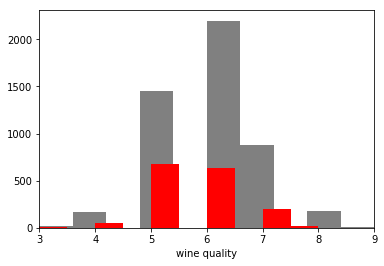

In [47]:
plt.hist(white_wines.quality, color='grey')
plt.hist(red_wines.quality, color='red')
plt.xlabel('wine quality')
plt.xlim(3,9)
plt.show()

In [52]:
# Analyze the correlation between features and the target
corr_white = white_wines.corr()

corr_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


## 2 Regression analysis (basic)
Let's try to model the quality of wine (target)  using the data about it's chemical compounds (features). Build a simple linear regression using the `statsmodels` library. Start only with two components that seem to have most influence. You should have got some ideas which variables might be important from your previous analysis of the data. Produce a regression table and discuss the results. How well does your model explain the target?



In [ ]:
# First regression using only two features


## 3 Full regression analysis 
Let's now  try to use all our features. Re-run the regression and check whether its results have improved. Which features seem to play major role? Do you observe any irrelevant features? Did it match the guess we made after looking at correlation? Why could that be? Try out a few more variants of your regression model by discarding less informative features.  

In [ ]:
# Codes for tasks 3.3


## 4 Comparing regression models
Working on the previous tasks, you have created several regression models for the same data set. You would want to know which model is best for your data. Briefly state which regression statistics you consider to determine the most suitable model. Use this task as an opportunity for verifying that you are familiar with the statistics that the regression output table provides.  

Briefly state your answers to 3.4 as a bullet list:
- ...
- ...
- ...

## 5 Residual analysis
Having discussed the suitability of alternative regression models above, you will now be ready to pick your preferred model. Create a residual plot for this model. Briefly discuss the purposes of a residual plot and your findings.

In [ ]:
# Residual plot



**Your comments on the residual plot** 

In general, the purpose of a residual plot is:

With regard to the above residual plot, I conclude:

# Well done. You did great in solving all the exercises!